In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
from nltk.corpus import stopwords
from wordcloud import wordcloud
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from wordcloud import WordCloud

In [26]:
! pip install --user <package>

The syntax of the command is incorrect.


In [27]:
data=pd.read_csv(r'E:\AI\final_AI\spam_ham_dataset.csv')
data


,Unnamed: 0,label,text,label_num,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,NaN,NaN,NaN,NaN
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,NaN,NaN,NaN,NaN
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,NaN,NaN,NaN,NaN
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,NaN,NaN,NaN,NaN
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,NaN,NaN,NaN,NaN
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,NaN,NaN,NaN,NaN
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,NaN,NaN,NaN,NaN
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,NaN,NaN,NaN,NaN


In [28]:
# data.drop(labels=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1)


In [29]:
len(data)

5171

In [30]:
!pip install tensorflow

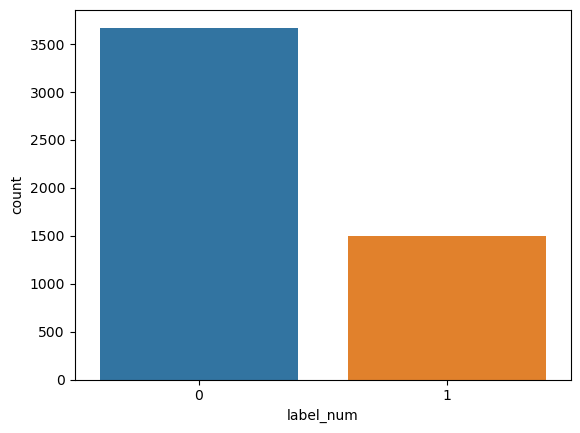

In [31]:
sns.countplot( x='label_num',data=data)
plt.show()


Text(0.5, 0, 'Message types')

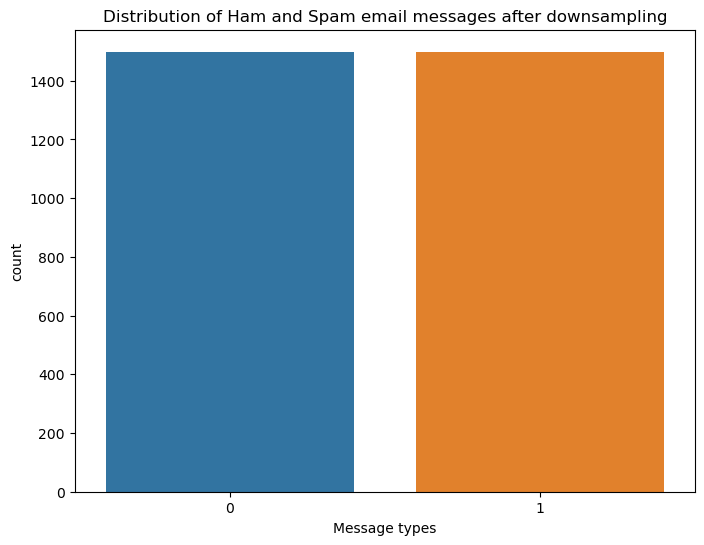

In [32]:
# Downsampling to balance the dataset
ham_msg = data[data.label_num == 0]
spam_msg = data[data.label_num == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)
# # Plotting the counts of down sampled dataset
balanced_data = pd.concat([ham_msg, spam_msg])
balanced_data = balanced_data.reset_index(drop=True)
data.head()
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='label_num')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types') 

In [33]:
len(data)

5171

In [34]:
data.head()

,Unnamed: 0,label,text,label_num,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,NaN,NaN,NaN,NaN
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,NaN,NaN,NaN,NaN
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,NaN,NaN,NaN,NaN
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,NaN,NaN,NaN,NaN
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,NaN,NaN,NaN,NaN


In [35]:
#Remove redundant data
balanced_data['text'] = balanced_data['text'].str.replace('Subject:', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,3444,ham,conoco - big cowboy\r\ndarren :\r\ni ' m not ...,0,NaN,NaN,NaN,NaN
1,2982,ham,feb 01 prod : sale to teco gas processing\r\n...,0,NaN,NaN,NaN,NaN
2,2711,ham,"california energy crisis\r\ncalifornia  , s ...",0,NaN,NaN,NaN,NaN
3,3116,ham,re : nom / actual volume for april 23 rd\r\nw...,0,NaN,NaN,NaN,NaN
4,1314,ham,eastrans nomination changes effective 8 / 2 /...,0,NaN,NaN,NaN,NaN


In [36]:
#Remove punctuation
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0,NaN,NaN,NaN,NaN
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0,NaN,NaN,NaN,NaN
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0,NaN,NaN,NaN,NaN
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0,NaN,NaN,NaN,NaN
4,1314,ham,eastrans nomination changes effective 8 2 0...,0,NaN,NaN,NaN,NaN


In [37]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        word = word.lower()
 
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
#print(stopwords.words('english'))
balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head(20)

,Unnamed: 0,label,text,label_num,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,3444,ham,conoco big cowboy darren sure help know else a...,0,NaN,NaN,NaN,NaN
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0,NaN,NaN,NaN,NaN
2,2711,ham,california energy crisis california  power cr...,0,NaN,NaN,NaN,NaN
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0,NaN,NaN,NaN,NaN
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0,NaN,NaN,NaN,NaN
5,3295,ham,lufkin may 27 th lufkin industrial market go 5...,0,NaN,NaN,NaN,NaN
6,205,ham,equistar fyi activity rescheduled reallocated ...,0,NaN,NaN,NaN,NaN
7,1172,ham,interview schedule liz bellamy today attached ...,0,NaN,NaN,NaN,NaN
8,2951,ham,calpine daily gas nomination julie mention ear...,0,NaN,NaN,NaN,NaN
9,1736,ham,enron hpl actuals september 29 october 1 2000 ...,0,NaN,NaN,NaN,NaN


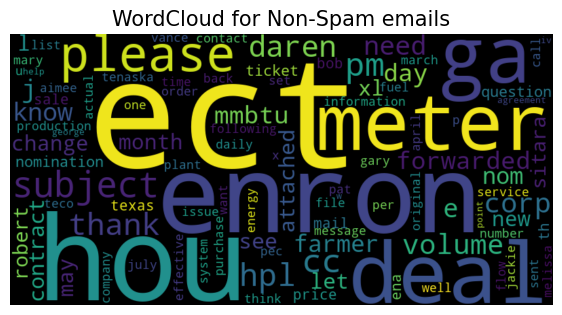

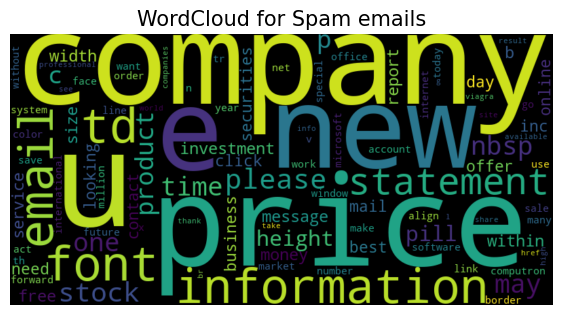

In [38]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
 
plot_word_cloud(balanced_data[balanced_data['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label_num'] == 1], typ='Spam')

In [39]:
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['label_num'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)
 
# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)
 
# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len, 
                                padding='post', 
                                truncating='post')
test_sequences = pad_sequences(test_sequences, 
                               maxlen=max_len, 
                               padding='post', 
                               truncating='post')

In [41]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
#                                     output_dim=32, 
#                                     input_length=max_len))
# model.add(tf.keras.layers.LSTM(16))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
# # Print the model summary
# model.summary()

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32, 
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [44]:
from keras.callbacks import ReduceLROnPlateau

In [45]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)
 
lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [46]:
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20, 
                    batch_size=32,
                    callbacks = [lr, es]
                   )
model.summary()

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5250 - loss: 0.6897 - val_accuracy: 0.6450 - val_loss: 0.5959 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7440 - loss: 0.5300 - val_accuracy: 0.9000 - val_loss: 0.2816 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9142 - loss: 0.2583 - val_accuracy: 0.9500 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9554 - loss: 0.1819 - val_accuracy: 0.9650 - val_loss: 0.1459 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9578 - loss: 0.1638 - val_accuracy: 0.9450 - val_loss: 0.1879 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9761 - loss: 0.1362 - val_accuracy: 0.9700 - val_loss: 0.1059 - learning_rate: 0.0010
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9887 - loss: 0.0652 - val_acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 32)        │     1,274,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,835,877 (14.63 MB)

 Trainable params: 1,278,625 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,557,252 (9.76 MB)

In [47]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9842 - loss: 0.0632
Test Loss : 0.07555227726697922
Test Accuracy : 0.9800000190734863


In [48]:
test_X.head()

1376    october flow meter 982694 zavisch 2 measuremen...
932     fw midcon 9401 permanent march file expanded d...
144     eastrans nomination change effective 9 23 00 p...
1752                             complimentary ibm laptop
51      fw first delivery rodessa operating co daren t...
Name: text, dtype: object

In [49]:
# text = test_X.sample(n=1,random_state=42).values[0]
# text = "Subject: Special Offer: Limited Time Discount on Health Supplements! Dear Valued Customer,Are you looking to boost your health and vitality? Look no further! We are excited to offer you an exclusive discount on our premium health supplements for a limited time only!Our supplements are carefully formulated using only the finest ingredients, backed by scientific research to ensure maximum effectiveness. Whether you're aiming to improve your immune system, increase energy levels, or support overall well-being, we have the perfect solution for you.As a valued member of our community, we're pleased to extend this special offer to you. Act now and enjoy up to 30% off on select products! Don't miss out on this opportunity to invest in your health and live your best life.Shop now and experience the difference with our top-quality supplements. Remember, this offer is only valid for a limited time, so hurry!Click the link below to explore our range of products and claim your discount today:[Insert Link]Thank you for choosing us as your trusted health partner.Best Regards,[Your Company Name]"
#text='photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin'
text ="friendly reminder to check on your fans We invite you to register and compete in 2023 Post World Finals Online ICPC Challenge powered by Huawei. It starts on Monday, May, 6, 2024 15:00 (UTC). The contest duration is 2 weeks. This round is unrated for all participant"
new_sequence = tokenizer.texts_to_sequences([text])
new_sequence_padded = pad_sequences(new_sequence, maxlen=max_len, padding='post', truncating='post')
prediction = model.predict(new_sequence_padded)
print(text)
print(prediction)
print("ket qua du doan: ",1 if prediction > 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
friendly reminder to check on your fans We invite you to register and compete in 2023 Post World Finals Online ICPC Challenge powered by Huawei. It starts on Monday, May, 6, 2024 15:00 (UTC). The contest duration is 2 weeks. This round is unrated for all participant
[[0.9838437]]
ket qua du doan:  1
